本段所在链接  https://github.com/scilearner/NoWaste  不要浪费

[Binder在线运行](http://mybinder.org/repo/scilearner/NoWaste/numpy_w_ref_solution.ipynb) 但我没用过 binder

<a href="https://colab.research.google.com/github/scilearner/NoWaste/blob/master/numpy_w_ref_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

推荐 https://github.com/rougier/numpy-100  感觉有点难了， 锻炼使用技巧


# NumPy 用什么用？

大数据MapReduce(Hadoop等), GPU编程(CuPy, PyTorch, Tensorflow, 百度的PaddlePaddle, 华为的MindSpore, 旷视的忘了), 花钱的Matlab

知名的Python科学计算/数值计算扩展库， numpy,scipy,matplotlib---pandas算数据分析，scikit-learn是机器学习库。

4月份 试讲了一次， 半个小时重头戏都没讲到， 但幻灯片做都做了（改都改了）， 不如完成一下。



幻灯片改动自 黄海广​ 教授 中国海洋大学，  https://zhuanlan.zhihu.com/p/391261981

没有向他问授权， 但我也不打算直接讲PPT

这是哪？ 这是 jupyter notebook， 还讲啥PPT啊。


### 整体形式

当然不是全部留空， 比如练习时， 安装命令还要现打？ 当然不浪费这时间啦。

1份 完整版 notebook --- 我虽然说过很多次要脱稿， 但, 咳， 理想是美好的， 现实再说吧

1份 练习版 notebook

考虑到视频长度， 肯定分段

## 题外话

学习没那么容易（但也不一定“难于上青天”）

用 斯科特•扬 《如何高效学习》（Learn More, Study Less!）里 说的 （我也不查原文了）  知识点之间尽可能多建立联结， 有利于学习和掌握 —— 也许在纯教育学里 这完全不是什么新颖的观点， 但人家的事迹很有吸引力。

那 NumPy 这种 一般教学模式是什么样的呢？ 

1. 挑一些常用函数 
2. 逐个介绍， 并给一两个例子

由于数值计算， 例子全是数值， 建立的联结就是比较脆弱、孤立的。

也就是说， 对零基础入门来说， 枯燥了点、理解有限， 而有基础的可能只是想查个别情景下的使用


我希望 我这个能更强调具体使用场景（一两个）， 并且以 jupyter notebook的形式， 也更有利于 查询检索——虽然我的表达能力 可能影响会影响检索质量和效率。

所以， 我尝试以一个主线来串联， 建立多一点的联结

1. 使用场景（不一定有）
2. 失败场景（不一定有）
3. 代码例子
4. 相关函数的对比

也许好一点， 大概好得不多。

## 预备

- Python          https://www.python.org/ 
- Miniconda https://conda.io/miniconda.html  
- 推荐这个 **Anaconda** www.anaconda.com/ 

**软件**

- VSCode            https://code.visualstudio.com/ 
- PyCharm Pro    https://www.jetbrains.com/pycharm/download


VS Code 带 jupytext, 应该好于 jupyterlab > jupyter notebook

比如目录功能， jupyter notebook 需要安装插件， 也挺麻烦的

另外， 我喜欢用 vim 的快捷键

另外， 除非电脑太卡了， 不然 NumPy的学习 不至于要用 Google Colab？

**虚拟环境**

创建虚拟环境 Virtual Environment


> virtualenv venv   
> source venv/bin/activate 

还是更推荐用 anaconda 创建——尤其是要安装 tensorflow-gpu时， 你需要找相应版本的 cudatoolkit和cudnn，

> conda create -n myenv python=3.9  
> conda activate myenv


# 安装

In [ ]:
!pip install ipython jupyterlab jupyter notebook 
!pip install numpy scipy matplotlib pandas torch

# https://developer.aliyun.com/article/652884
# -i https://pypi.tuna.tsinghua.edu.cn/simple 
# --trusted-host  mirrors.aliyun.com

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


In [1]:
import numpy as np
import time

np.set_printoptions(precision=3)

# NumPy 是什么

NumPy(Numerical Python)是Python的一种开源的数值计算扩展库。 提供了两种基本对象：

1. ndarray：全称（n-dimensional array object）是储存单一数据类型的多维数组。
2. ufunc：全称（universal function object）它是一种能够对数组进行处理的函数。


## 为什么要用 NumPy

跟原生Python的对比

In [3]:
import numpy as np
import time

np.set_printoptions(precision=3)

In [2]:
n = 100
a1 = np.random.random(size = (100, 100))
a2 = np.random.random((100, 100))
a3 = np.zeros(shape = (100, 100))

NameError: name 'np' is not defined

In [7]:
# 原生python
# 偷懒了， 没用 list 列表

start = time.time()

for i in range(n):
    for j in range(n):
        for k in range(n):
            a3[i][j] += a1[i][k] * a2[k][j]
end = time.time()
print(end - start, 'second(s)')

0.887291431427002 second(s)


In [8]:
start = time.time()
a3_np = np.dot(a1, a2)
end = time.time()
print(end - start, 'second(s)')

0.0911872386932373 second(s)


In [10]:
a3_np - a3

array([[ 0.000e+00,  3.553e-15,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         3.553e-15],
       [ 0.000e+00,  0.000e+00,  3.553e-15, ...,  0.000e+00,  0.000e+00,
         3.553e-15],
       [ 0.000e+00, -3.553e-15,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       ...,
       [ 0.000e+00,  0.000e+00,  0.000e+00, ..., -3.553e-15,  0.000e+00,
         0.000e+00],
       [ 0.000e+00,  0.000e+00, -3.553e-15, ..., -3.553e-15,  0.000e+00,
        -3.553e-15],
       [ 3.553e-15, -3.553e-15,  0.000e+00, ...,  0.000e+00,  0.000e+00,
        -3.553e-15]])

# 主线介绍

本文使用的例子如下图， 是一个3路softmax 分类任务的流程,  只用于展示numpy使用， 不涉及训练模型。

![Softmax 3-分类](https://raw.githubusercontent.com/scilearner/NoWaste/master/image/3_class_demo.png)

此模块在 图像文本分类 包括 文本生成 都很常见。

![Softmax 3-分类](https://raw.githubusercontent.com/scilearner/NoWaste/master/image/softmax_from_transformer.png)


为了简单， 对数据做一个简单假设， $X \in R^{n \times d}, z \in R^{d \times K}$, 其中 $n=300, d=5, K=3$,  大概如图

![Softmax 3-分类 数据](https://raw.githubusercontent.com/scilearner/NoWaste/master/image/3_gaussian.png)

In [12]:
# 为了得到一个分类预测、即走完流程图
# 需要哪些功能



# 大胆猜， 反正没检查


需要

1. 数据$X\in R^{n \times d}$——读取或生成创建
2. 模型参数$W\in R^{d \times K}$——生成创建
3. 数据通过模型（进行运算）$z = XW \in R^{n\times K}—— 矩阵乘法 
4. softmax里的 指数函数、求和 —— 涉及数轴和 **广播**
5. 交叉熵的计算 涉及到的内容 现在还说不清楚 —— **索引**与 **切片**

$X$ 和 $W$ 在 NumPy里 都是 用 ndarray对象表示

和 PyTorch 不一样，  PyTorch以 张量Tensor 为基础， 但模型参数默认有梯度， 和纯粹的数据是不太一样的


## 数组概念

N 维数组对象 ndarray (n-dimensional array object)

在不关注底层实现的情况下， 

所谓“用于存放同类型元素的多维数组”， 那是相对原生Python的列表、元组的优势， 而且仅限于 数值计算 领域。

- 比如， 根据 数组里具体的元素个数 和 元素类型， 可以直接得到该数组占的内存大小 —— C语言、JAVA语言都是这样
- 又比如， NumPy的数组对象 简化逻辑、 提高运算速度、不用写循环——就是封装的函数——更复杂的逻辑 该写循环还是要写循环的

这种“特点”， 属于 概念提炼， 属于一种总结、写作能力， 又需要相关背景。 自己总结不出来， 但看了总结，又觉得“无用”。


# NumPy 数组的创建

想要得到一个 ndarray 数组对象，方法：

1. 来自其他   
   图片、CSV、 原生Python的列表list/元组tuple、 PyTorch的张量、 Pandas、 多个ndarry数组
2. 创建数组


## 其他转换

In [ ]:
# 读图片的模块 有很多种——我的意思就是我不怎么看
# https://zhuanlan.zhihu.com/p/402833064

# CSV， 起码有两个， 一个python内置csv, 另一个pandas

# PyTorch
tensor_torch.detach().cpu().numpy()

In [4]:
# Python的列表或元组
# data = np.array( 列表或元组 )

list_1 = [1, 2, 3, 4]
tuple_1 = (5, 6, 7, 8)

array1 = np.array(list_1)
array2 = np.array(tuple_1)

type(array1), type(array2)

(numpy.ndarray, numpy.ndarray)

In [5]:

data1 = np.array([1, 2, 3]) # 创建一个一维数组

data2 = np.array([[1, 2, 3], [4, 5, 6]]) # 创建一个二维数组

data1, data2 

(array([1, 2, 3]),
 array([[1, 2, 3],
        [4, 5, 6]]))

In [6]:
# 但反过来， ndarray转list可就

list(data1), list(data2)

([1, 2, 3], [array([1, 2, 3]), array([4, 5, 6])])

## 数组的主要属性

个人觉得最常用的只有一个shape 形状/维度

其他的 一般不用， shape
- ndim 维度个数
- size 元素个数
- dtype 元素类型

In [8]:
data1.shape, data2.shape

((3,), (2, 3))

## 创建

为了创建/初始化一个数组对象， 我们需要一些信息：

1. 形状
2. 数值——全0、全1、随机（高斯、均匀）、序列
3. 类型——整数、浮点， 精度

数值内容为函数名， 形状与类型则为参数

所以还是得列举， 我们生成数据当然是用随机的概率分布， 但权重W 没规定

In [7]:
# 全0
all_0 = np.zeros(shape=(2, 3, 1, 5))

# 全1
all_1 = np.zeros(shape=(2, 2, 7, 1))

# 全 指定值
all_v = np.full(3, np.pi)

# 只分配空间——原则上说，这个的必要性在哪里？
all_empty = np.empty([2, 3])

# 空——也没什么意义
empty = np.array([])

# 单个数——更没必要
v = np.array(234.523)


还有一些特定情况

比如 
- 单位矩阵/方阵 identity matrix  2d 2维的
- 对角线矩阵

各种序列
- 用作 x轴 的自然数序列
- 等差数列


In [15]:
# 0，1，2，3，4，....N-1 这种序列， 来自原生python 的 range 函数
# numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)
a = np.arange(10)
print(a)

a2 = np.arange(10.1, step=2, dtype=np.int32)
print(a2)

# [start, stop] 闭区间的函数有没有？
# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)[source]
# 等间隔
a3 = np.linspace(0, 10, 10)
print(a3)
print(a3.shape)

[0 1 2 3 4 5 6 7 8 9]
[ 0  2  4  6  8 10]
[ 0.     1.111  2.222  3.333  4.444  5.556  6.667  7.778  8.889 10.   ]
(10,)


自定义函数 创建ndarray

numpy create custom array

要用到 fromfunction

另外还有像 ones_like(ndarray), zeros_like(ndarray), 用 ndarray.shape 传给 原函数 也行

## 概率分布创建随机数组

有很多分布都有实现， 但我们最常用的不外乎：

1. 均匀分布， [0,1)的均匀分布
2. 高斯分布， N(0, 1)的正态分布
3. 离散的均匀分布， 也就是 掷N面骰子


In [17]:
# [0， 1) 的均匀分布
a1 = np.random.rand( 2, 3, 3, 3 )
print(a1.shape)

# 无参数
print(np.random.rand())

# 完整版均匀分布
a2 = np.random.uniform(low=-3, high=3, size=[1,2])
print(a2.shape)

# 正态分布 N(0, 1)
a3 = np.random.randn( 1, 6, 8 )
print(a3.shape)

# 完整版高斯分布
a4 = np.random.normal(loc=0, scale=0.1, size=[6, ])
print(a4.shape)

(2, 3, 3, 3)
0.2852487205924815
(1, 2)
(1, 6, 8)
(6,)


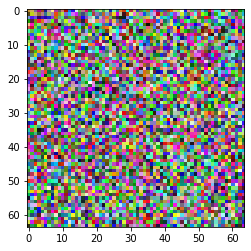

In [3]:
# 画个随机图片玩玩

img =  np.random.uniform(low=0.0, high=1.0, size=(64, 64, 3))
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()
plt.close()


In [27]:
# 均匀分布里的 low 和 high

a1 = np.random.uniform(low=[1,2], high=[4,5], size=[3, 2])
print(a1)

# 失败例子
# a2 = np.random.uniform(low=[1,2,3], high=[4,5,6], size=[3, 2])
# print(a2)

# 高斯分布里的 loc 和 scale Standard deviation
a3 = np.random.normal(loc=[0, 2, 3], scale=0.1, size=[4, 3])
print(a3.shape)

a4 = np.random.normal(loc=[0, 2, 3], scale=[0.1, 0.2, 0.3], size=[4, 3])
print(a4.shape)

[[1.931 4.803]
 [2.217 3.067]
 [2.725 3.466]]
(4, 3)
(4, 3)


### 随机种子

为了随机采样结果的可重复性， NumPy 提供了 设置随机种子的函数


In [30]:
np.random.seed(42)
v1 = np.random.rand()
v2 = np.random.rand()
print(v1, v2, v1==v2)

0.3745401188473625 0.9507143064099162 False


In [31]:
np.random.seed(42)
v1 = np.random.rand()
np.random.seed(42)
v2 = np.random.rand()
print(v1, v2, v1==v2)

0.3745401188473625 0.3745401188473625 True


## 元素类型

ndarray里的元素具有相同的元素类型。

常用的有int（整型， 无符号unsigned），float（浮点型），complex（复数型）， 再加上精度。 还有 True/False的布尔值。 字节值byte。

类型: [int, uint, float]   
精度: [8, 16, 32, 64]

除了图片 0-255 是 uint8以外，  其他情况32、64该怎么选， 我也没太在意过。

### 类型转换

除了创建时， 参数设置dtype=... 以外， 需要直接转换类型

In [33]:
print(a2)
a2.astype(np.int32)

[[-0.236 -2.555]]


array([[ 0, -2]])

副本或视图in-place

函数 是返回一个副本 copy 呢， 还是返回一个视图view, in-place改变原数组的值

没怎么在意， 也不需要在意， in-place的很少，而且基本能猜到

## 形状变换

已知ndarray的形状属性 ndarray.shape

有时需要变换形状

比如， 需要把 (3, w, h)的图片 变成一个 3*w*h的向量， 又或者 (w, h, 3)的数轴顺序

也许可以分为

1. Shaping 变形
2. Transposition 调换

### 变形

shaping

主要用的就是 ndarray.reshape(shape, order='C')

其他 flatten什么的， 都可以用reshape来代替

In [34]:
a = np.arange(6)

a.reshape((2, 3))

# order 不用管它

array([[0, 1, 2],
       [3, 4, 5]])

In [35]:
a = np.arange(24)

a.reshape((2, 3, 4))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [37]:
# -1 的特殊指代 与 flatten

feature_map = np.random.rand(100, 3, 32, 32) 
# 转特征向量
feature_vector = feature_map.reshape(100, -1)
print(feature_vector.shape)

fv2 = feature_map.flatten()
print(fv2.shape)


(100, 3072)
(307200,)


In [45]:
# PyTorch里的flatten
import torch
fm = torch.randn(100, 3, 32, 32)
print(fm.shape)
fv = fm.reshape(100, -1)
print(fv.shape)

fv2 = fm.flatten()
print(fv2.shape)

fv3 = fm.flatten(start_dim=1, end_dim=-1)
print(fv3.shape)

# 为什么pytorch会多参数， 因为 一般是一个批次batch的数据

torch.Size([100, 3, 32, 32])
torch.Size([100, 3072])
torch.Size([307200])
torch.Size([100, 3072])


### 调换数轴顺序

Transposition 轴axes的顺序调换

常见情况

1. 2维矩阵转换 $A^T A$,  像属性一样的 ndarray.T
2. 通用的调换 ndarray.transpose

#### 矩阵转置


In [5]:
# 转置

m = np.arange(12).reshape(3, 4)
print(m)
m2 = m.T
print(m2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [6]:
m2[0][0] = 100
print(m2)
print(m)

# 可见， 返回的是 ____   

[[100   4   8]
 [  1   5   9]
 [  2   6  10]
 [  3   7  11]]
[[100   1   2   3]
 [  4   5   6   7]
 [  8   9  10  11]]


#### 数轴调换

好像也不怎么常用， 印象中只有 pytorch的图片格式 (c, size, size) 与 tf/numpy用的 (size, size, c)

而 2D矩阵的 宽w和高h 用 转置就行了

In [7]:
img = np.random.rand(100, 3, 64, 64)
img_after = img.transpose((0, 2, 3, 1))
img_after.shape

(100, 64, 64, 3)

In [8]:
# n>2情况下的转置
img = np.random.rand(1,2,3,4)
img_after = img.T
img_after.shape

(4, 3, 2, 1)

In [10]:
# 转置

m = np.arange(12).reshape(3, 4)
print(m)
m2 = m.transpose((1,0))
print(m2)

m2[0][0] = 100
print(m2)
print(m)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]
[[100   4   8]
 [  1   5   9]
 [  2   6  10]
 [  3   7  11]]
[[100   1   2   3]
 [  4   5   6   7]
 [  8   9  10  11]]


## 主线实例第一步-创建数组

目标: 初始化 $𝑋 \in 𝑅^{𝑛 \times 𝑑}$ 及 $𝑊 \in R^{d\times K}$ 

𝑛=300, 𝑑=5, 三个类别K=3，对应高斯分布 均值、方差分别为：([0,0,0,0,0], 1), ([3,4,5,4,3], 0.5), ([3,-4,5,-4,3], 0.8)


In [12]:
np.random.seed(666)

# 初始化 W

W = np.random.randn(5, 3)

# 初始化三个聚簇的数据 X ——不想搞平均
c1 = np.random.normal([0,0,0,0,0], 1, size=(150, 5))
c2 = np.random.normal([3,4,5,4,3], 0.5, size=(100, 5))
c3 = np.random.normal([3,-4,5,-4,3], 0.8, size=(50, 5))

# 初始化 标签 𝑌∈{0,1,2}^𝑛

y1 = np.zeros(150, dtype=np.int32)
y2 = np.ones(100, dtype=np.int32)
y3 = np.full(50, 2, dtype=np.int32)

# 问题？


## 数组的合并/拼接

多个多维数组进行 连接/合并/拼接 操作

常用方法有：

concatenate(), vstack(), hstack()

仅介绍 concatenate()函数 对应 PyTorch torch.cat()

> numpy.concatenate((a1, a2, ...), axis=0, out=None, dtype=None, casting="same_kind")

concatenate 函数会将 (𝑎1,𝑎2,…) 多个ndarray沿着 *指定axis轴* 进行拼接

因此其他维数必须相等


(300, 5)
(300,)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 150 and the array at index 1 has size 100

In [15]:
# 例子， 换个轴

a1 = np.random.rand(10, 5, 10)
a2 = np.random.rand(10, 1, 10)
a = np.concatenate([a1, a2], axis=1)
a.shape

(10, 6, 10)

维度数不相等

最常见的情况是已有n， 再加1

In [17]:
a1 = np.random.rand(10, 3, 32, 32)
a2 = np.random.rand(3, 32, 32)
a = np.concatenate((a1, a2.reshape(1, 3, 32, 32)), axis=0)
a.shape

(11, 3, 32, 32)

In [18]:
a = np.concatenate((a1, a2[np.newaxis]), axis=0)  # 或 None
a.shape

(11, 3, 32, 32)

In [20]:
a1 = np.random.rand(10, 3, 32, 32)
a2 = np.random.rand(10, 32, 32)
a = np.concatenate((a1, a2[:, None]), axis=1)
a.shape

(10, 4, 32, 32)

## 总结/实例

1. 多种创建函数
2. 属性: 类型dtype, 类型转换 astype; 形状shape, 变形reshape, 调换 .T 和 transpose
3. 多个ndarray的拼接

In [22]:
np.random.seed(666)

# 初始化 W

W = np.random.randn(5, 3)
print(W.shape)

# 初始化三个聚簇的数据 X ——不想搞平均
c1 = np.random.normal([0,0,0,0,0], 1, size=(150, 5))
c2 = np.random.normal([3,4,5,4,3], 0.5, size=(100, 5))
c3 = np.random.normal([3,-4,5,-4,3], 0.8, size=(50, 5))

# 初始化 标签 𝑌∈{0,1,2}^𝑛

y1 = np.zeros(150, dtype=np.int32)
y2 = np.ones(100, dtype=np.int32)
y3 = np.full(50, 2, dtype=np.int32)

x = np.concatenate((c1, c2, c3), axis=0)
print(x.shape)

y = np.concatenate((y1, y2, y3))
print(y.shape)

(5, 3)
(300, 5)
(300,)


# 数组运算 与 广播机制broadcasting

## 基本函数

## 数组相乘函数

## 主线实例第二步 数组相乘运算

## 批次数组运算

batch matrix multiplication
场景：  self-attention自注意力层


## 主线实例第三步 softmax计算

## 数轴

## 广播

# 索引indexing 与 切片slicing

## 主线实例第四步 交叉熵计算

已知概率向量 $\hat{y} \in R^{n\times K}$,  𝑦∈𝑅^𝑛,𝑛=300,𝑑=5,𝐾=3

目标函数 和 损失函数的关系

交叉熵损失函数 

$$ - \sum^K_i y_i \log (\hat{y})$$

计算方案， 不外乎两种

1. 扩展y, 用 𝑦 构建 one-hot 编码 𝑅^(𝑛×𝐾)，再对位相乘
2. 收缩$\hat{y}$, 以 𝑦 作为 下标索引，直接选择对应的$\log \hat{y}$值

需要索引indexing功能。

切片slicing 就是一种特定的、 连续的序列索引。 不卡概念的话， 就是没什么区别。

一维numpy的 ndarray的切片和 python列表list是一样的。

多维ndarray 使用 [, ,...,] matlab式的索引切片， 用','分隔开不同轴

In [9]:
# 一维索引与切片
a = np.arange(10)
print( a )

# 单个值作为下标 只返回一个值
# 用 切片:,  列表/元组， ndarray 则返回 ndarray

a[5], a[[5, 2]], a[3:5], a[:5], a[:-1], a[1:-1:2], a[::-1], a[5:1:-2]

[0 1 2 3 4 5 6 7 8 9]


(5,
 array([5, 2]),
 array([3, 4]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([1, 3, 5, 7]),
 array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0]),
 array([5, 3]))

In [8]:
# 可以通过切片 对ndarray中的元素进行更改。
a[2:4] = 100, 101
a

array([  0,   1, 100, 101,   4,   5,   6,   7,   8,   9])

In [10]:
# 多维数组切片 也一样， 需要把不同的数轴用 ',' 隔开  
a = np.arange(0, 60, 10).reshape(-1, 1) + np.arange(0, 6)
print(a)

a[0, 3:5],  a[4:, 4:],  a[2::2, ::2] 

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


(array([3, 4]),
 array([[44, 45],
        [54, 55]]),
 array([[20, 22, 24],
        [40, 42, 44]]))

In [12]:
# 只管一个轴

a[0][3:5],  a[4:][4:],  a[2::2][::2] 

(array([3, 4]),
 array([], shape=(0, 6), dtype=int32),
 array([[20, 21, 22, 23, 24, 25]]))

### 存储空间共享

ndarray通过切片产生一个新的数组b，b和a共享同一块数据存储空间。

如果我们想创立原数组的副本，我们可以用整数元组，列表，整数数组，布尔数组进行切片。


In [14]:
a = np.arange(10)
print(a)
b = a[3:7] 
b[2] = -10

b, a

[0 1 2 3 4 5 6 7 8 9]


(array([  3,   4, -10,   6]),
 array([  0,   1,   2,   3,   4, -10,   6,   7,   8,   9]))

In [15]:
b = a[[3, 3, -3, 8]]
print(b)
b[2] = 100
b, a

[3 3 7 8]


(array([  3,   3, 100,   8]),
 array([  0,   1,   2,   3,   4, -10,   6,   7,   8,   9]))

比较运算与布尔逻辑运算

可以用整数元组，列表，整数数组，布尔数组进行切片。

ndarray 还支持比较运算和布尔逻辑运算


In [17]:
np.random.seed(6)
a = np.random.rand(10)
print(a)

# 每个元素是否大于 0.5
print(a > 0.5)

# 取反
print( ~(a > 0.5) )

# 布尔数组切片
print( a[a>0.5])

[0.893 0.332 0.821 0.042 0.108 0.595 0.53  0.419 0.335 0.623]
[ True False  True False False  True  True False False  True]
[False  True False  True  True False False  True  True False]
[0.893 0.821 0.595 0.53  0.623]


In [ ]:
prob = e_z / sum_e_z  # (300, 3)
log_prob = np.log(prob)

y.shape, log_prob.shape

In [6]:
prob = e_z / sum_e_z  # (300, 3)
log_prob = np.log(prob)

# 1. 用 𝑦 构建 one-hot 编码 𝑅^(𝑛×𝐾)， 再对位相乘
one_hot = np.zeros((n, k))
one_hot[np.arange(len(y)), y] = 1
prod = one_hot * log_prob

# 注意不能直接求平均， n个样本， 不是 n*3个的值
np.sum(prod) / n

NameError: name 'e_z' is not defined

In [ ]:
# 2. 以 𝑦 作为 下标索引，直接选择对应的log值
indi_v = log_prob[np.arange(len(y)), y]
np.mean( indi_v )

# 主线总结

本节基于 一层全连接 + softmax 分类 + 交叉熵 cross entropy loss， 简单介绍了 NumPy的一些常用函数和机制（不是背后的实现机制）

1. 创建ndarray
2. ndarray属性: 类型与形状，变换方法 astype/reshape/transpose
3. 数组运算函数， dot/matmul, 扩展了下 batch matrix multiplication, 因为PyTorch有单独的函数 bmm. 
4. 数轴axis及广播broadcasting
5. 切片slicing与索引indexing


# 其他

## 排序

> np.sort(ndarray, axis=-1) 即默认最后一轴

## split 划分数组

> numpy.split(ary, indices_or_sections, axis=0)  
> args:    indices_or_sections: int or 1-D array

In [4]:
a = np.array([6, 3, 7, 4, 6, 9, 2, 6, 7, 4, 3, 7])
idx = np.array([ 1,  3,  6,  9, 10])
np.split(a, idx) # 按元素位置进行分段


[array([6]),
 array([3, 7]),
 array([4, 6, 9]),
 array([2, 6, 7]),
 array([4]),
 array([3, 7])]

In [5]:
np.split(a, 2) # 按数组个数进行分段

[array([6, 3, 7, 4, 6, 9]), array([2, 6, 7, 4, 3, 7])]

# 结束语

NumPy 作为 数值计算 的扩展库， 我一时只能想到 深度学习的例子， 肯定不够全面

以后能用到、想到时， 再更新——大概不会了。

更复杂的 数值积分、 傅里叶变换， scipy的各种函数，  如果熟悉经典方法的应用场景 肯定能很容易地上手API接口。 单独的、又很熟悉的三五个函数名字 搜一次， 差不多就能记住了。

## 时间花费

PPT制作： 在别人PPT基础上， 不干活2、3天， 磨蹭2、3天，真开始改写又是2天。

notebook制作， 也花了不少时间， 1、2天吧——下回计时——如果有下回的话（PyTorch)。